Importing the module from the Task 1 directory. The os and sys modules allow for the import to be made generic for the purpose of this example notebook.

In [1]:
import sys
import os

# Get the current script's directory
current_dir = os.path.dirname(os.path.abspath('Task_2'))

# Construct the path to Task_1 relative to the script's directory
task_1_path = os.path.abspath(os.path.join(current_dir, '..', 'Task_1'))

# Add the path to sys.path
sys.path.append(task_1_path)

from jupiter import Moons

Next the a jupiter_moons instance of the Moons class is created, the same as in the first example. This is then checked for missing data in the coulumns which will be used with the **detect_missing_values()** function.

In [2]:
jupiter_moons = Moons("jupiter_kepler.db", "data/")

jupiter_moons.detect_missing_values()

,Missing Count,Missing Percentage
moon,0,0.000000
period_days,0,0.000000
distance_km,0,0.000000
radius_km,0,0.000000
mag,3,5.357143
mass_kg,50,89.285714
group,0,0.000000
ecc,0,0.000000
inclination_deg,0,0.000000


Time and distance are converted to SI units using the **convert_distance()** and **convert_time()** functions. The semi_major_axis is then created using the distance in meters and the eccentricity of the orbit and the **gen_sma()** function. 

In [3]:
jupiter_moons.convert_distance("km", "distance_km")
jupiter_moons.convert_time("days","period_days")
jupiter_moons.gen_sma("distance_m","ecc","semi_major_axis")

The data is then prepared for test and train regression calculations using the **prepare_data()** function for kepler's law calculation. This squares the inputted time data and cubes the inputted sma data. 

Here the sma calculated with the eccentricity of the orbit is called sma_cubed and the distance_m is used as an approximate sma value: approx_sma_cubed.

In [4]:
jupiter_moons.prepare_data("period_s","semi_major_axis", "period_s_squared", "sma_cubed")
jupiter_moons.prepare_data("period_s","distance_m", "period_s_squared", "approx_sma_cubed")

The calculated vaules are then checked to see if they are in the expected range.

In [5]:
jupiter_moons.all_data().head()

,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg,distance_m,period_s,semi_major_axis,period_s_squared,sma_cubed,approx_sma_cubed
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03,1.290000e+08,25747.2,1.291938e+08,6.629183e+08,2.156378e+24,2.146689e+24
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00,2.323100e+10,63072000.0,3.156386e+10,3.978077e+15,3.144635e+31,1.253729e+31
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37,1.814000e+08,43027.2,1.819805e+08,1.851340e+09,6.026632e+24,5.969141e+24
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60,2.130000e+10,54432000.0,2.580957e+10,2.962843e+15,1.719263e+31,9.663597e+30
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00,2.400000e+10,65750400.0,4.225352e+10,4.323115e+15,7.543775e+31,1.382400e+31


Scatter plot of the different prepared sma values against prepared time to gauge whether a linear regression is appropriate. 

Approx_sma_cubed is clearly more linear than the calculated sma_cubed and as such will be used for the rest of the linear regression calculations.

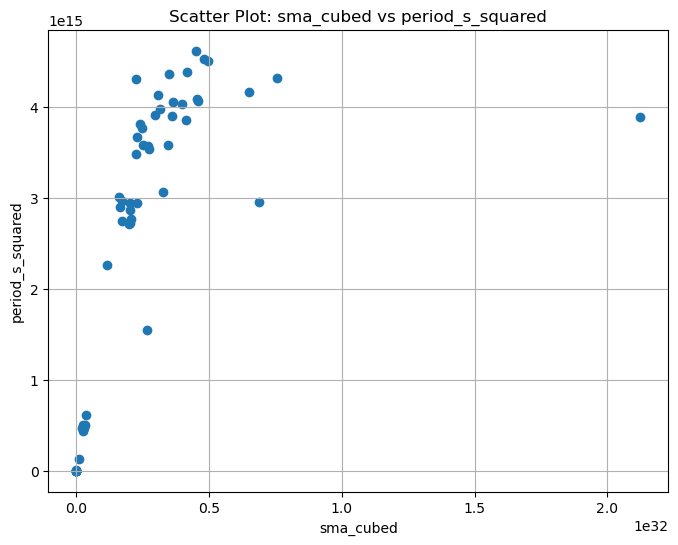

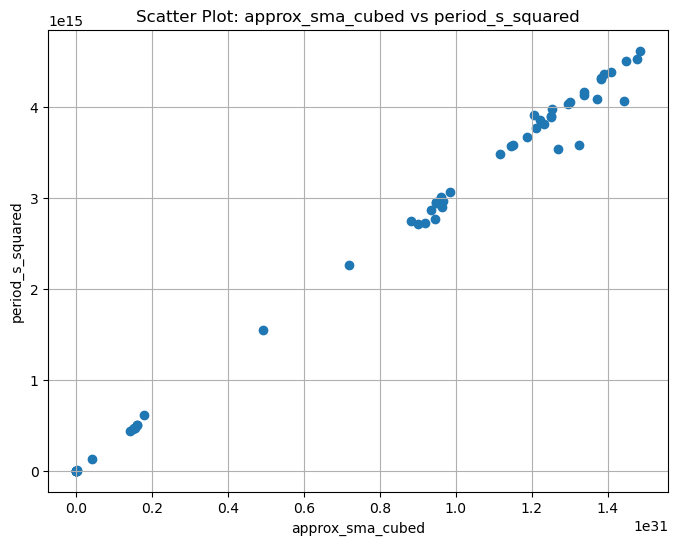

In [6]:
jupiter_moons.plot_scatter("period_s_squared","sma_cubed")
jupiter_moons.plot_scatter("period_s_squared","approx_sma_cubed")

The **test_train()** function is then used on the period_s_squared and approx_sma_cubed data. This trains the linear regression model on the provided datasets with a test train split. Default split is .3 and random state set to 42. 

In the left plot output the x_test, y_test is plotted in blue and the x_test,y_predicted is plotted in red.

The right plot shows the residuals. 

The r2_score and mean squared error of the regression calculation is also printed.

These outputs allow you to determine if the model is a good enough fit to proceed with the calulations using the model. 

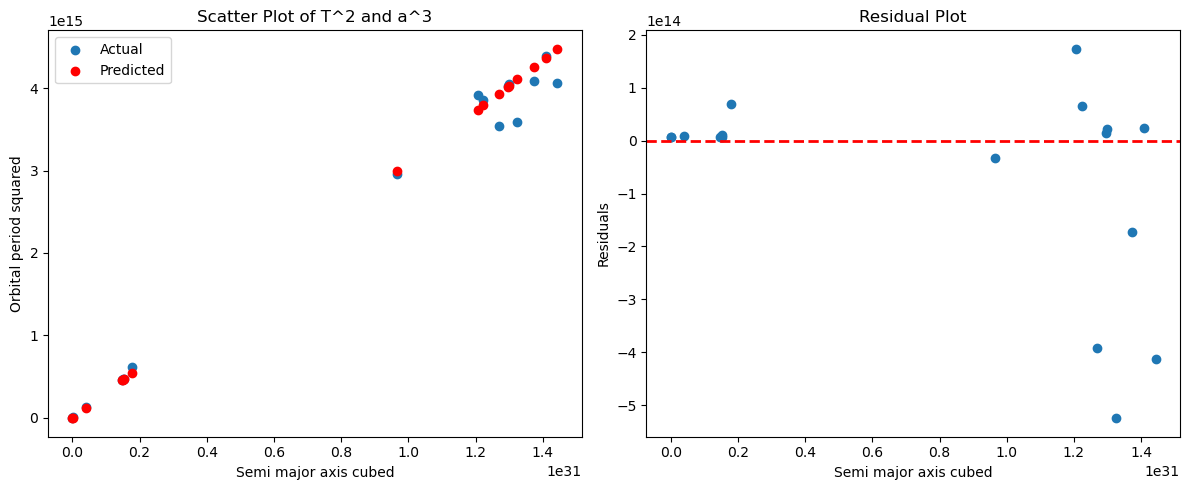

 r2_Score: 0.9874698094589166
mean squared error: 3.9427519223478265e+28


In [7]:
jupiter_moons.test_train("period_s_squared","approx_sma_cubed")

The **estimate_planet_mass()** function uses the trained model to calculate the mass of the planet that the moons orbit. This could also be used to calculate the mass of the sun given the planet data of the solar system. 

In [8]:
jupiter_moons.estimate_planet_mass()

Estimated mass of Planet: [1.90327657e+27] kg
